# Análisis de Engagement

En esta sección se analiza el tipo de contenido que genera mayor engagement en la plataforma. Se definirán métricas de engagement (como la suma o promedio de likes, shares y comentarios) y se evaluará el rendimiento de cada tipo de contenido (artículo, lista, video, etc.). 


## 1. Setup inicial

En esta sección se importan las librerías necesarias y se cargan los datasets procesados. Se utiliza un enfoque modular importando funciones específicas del módulo `engagement.py` para el análisis de interacciones.

Los datasets cargados son:
- `content`: Información sobre el contenido disponible en la plataforma
- `engagement`: Datos de interacciones de usuarios con el contenido (likes, shares, comentarios)

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from src.analysis.engagement import *
from utils.utils_peliplat import *

# Cargar datos
content = pd.read_csv('../data/processed/peliplat_content_clean.csv', parse_dates=['publish_date'])
engagement = pd.read_csv('../data/processed/peliplat_engagement_clean.csv')


## 2. Cálculo de métricas de engagement

En esta sección se calculan las métricas combinadas de engagement a partir de los datasets cargados. Se utiliza la función `calcular_metricas_engagement` para combinar los datos de contenido y engagement.

Se calculan y verifican las siguientes métricas:
- `total_engagement`: Suma total de likes, shares y comentarios por contenido
- `engagement_rate`: Porcentaje que representa el engagement total respecto a las visitas

In [12]:
# Calcular métricas combinadas de engagement
df = calcular_metricas_engagement(content, engagement)

# Verificar que el cálculo se realizó correctamente
print(f"Total de registros procesados: {len(df)}")
print("\nColumnas calculadas:")
for col in ['total_engagement', 'engagement_rate']:
    print(f"- {col}: {df[col].notna().sum()} valores no nulos")

Total de registros procesados: 300

Columnas calculadas:
- total_engagement: 300 valores no nulos
- engagement_rate: 300 valores no nulos


## 3. Análisis de engagement por tipo de contenido

Se analiza el engagement promedio según el tipo de contenido (Artículo, Lista, Video). Se utiliza la función `analizar_engagement_por_grupo` para calcular métricas agregadas por tipo.

Se muestran estadísticas como cantidad de contenidos, promedio de visitas, likes, shares, comentarios y tasas de engagement para cada tipo.

In [13]:
# Análisis por tipo de contenido
engagement_tipo = analizar_engagement_por_grupo(df, 'type')

# Mostrar y guardar resultados
mostrar_tabla(
    engagement_tipo,
    titulo="Engagement promedio por tipo de contenido",
    guardar=True,
    nombre_archivo="engagement_by_type"
)


Engagement promedio por tipo de contenido


,type,cantidad,p_visitas,p_likes,p_shares,p_comments,p_engagement_total,p_tasa_engagement(%)
0,Artículo,99,50.26,3.58,0.49,1.74,5.81,11.71
1,Lista,92,49.82,3.63,0.43,1.64,5.71,11.73
2,Video,109,49.96,3.09,0.43,1.50,5.02,10.02


Tabla guardada en HTML: ../reports/tables\engagement_by_type.html
Tabla guardada en PNG: ../reports/tables\engagement_by_type.png


## 4. Análisis de engagement por categoría

Se analiza el engagement promedio según la categoría de contenido (Clásicos, Indie, Mainstream, Documental). Se utiliza la función `analizar_engagement_por_grupo` agrupando por categoría.

Los resultados se visualizan en una tabla formateada y se guardan tanto en formato HTML como imagen para su inclusión en informes.

In [14]:
# Análisis por categoría
engagement_categoria = analizar_engagement_por_grupo(df, 'category')

# Mostrar y guardar resultados
mostrar_tabla(
    engagement_categoria,
    titulo="Engagement promedio por categoría",
    guardar=True,
    nombre_archivo="engagement_by_category"
)


Engagement promedio por categoría


,category,cantidad,p_visitas,p_likes,p_shares,p_comments,p_engagement_total,p_tasa_engagement(%)
0,Clásicos,81,49.60,3.68,0.52,1.95,6.15,12.52
2,Indie,82,50.22,3.48,0.39,1.46,5.33,10.77
3,Mainstream,74,50.57,3.22,0.47,1.57,5.26,10.26
1,Documental,63,49.63,3.24,0.43,1.46,5.13,10.69


Tabla guardada en HTML: ../reports/tables\engagement_by_category.html
Tabla guardada en PNG: ../reports/tables\engagement_by_category.png


## 5. Identificación de contenidos destacados

Se identifican los 10 contenidos con mayor engagement total en la plataforma mediante la función `obtener_top_contenidos`. 

La tabla resultante se visualiza con formato mejorado y se guarda para su posterior inclusión en el informe final, mostrando métricas detalladas de cada contenido destacado.

In [15]:
# Obtener top 10 contenidos por engagement
top_contenidos = obtener_top_contenidos(df, n=10)

# Mostrar y guardar resultados
mostrar_tabla(
    top_contenidos,
    titulo="Top 10 contenidos con mayor engagement",
    guardar=True,
    nombre_archivo="top_10_engagement"
)


Top 10 contenidos con mayor engagement


,content_id,type,category,visits,likes,shares,comments,total_engagement,engagement_rate
52,C0052,Video,Indie,46,15.00,0.00,8.00,23.00,50.00
174,C0174,Lista,Clásicos,43,12.00,1.00,8.00,21.00,48.84
40,C0040,Video,Indie,48,14.00,1.00,5.00,20.00,41.67
146,C0146,Video,Documental,53,9.00,1.00,10.00,20.00,37.74
161,C0161,Artículo,Documental,52,13.00,0.00,7.00,20.00,38.46
263,C0263,Video,Clásicos,60,11.00,2.00,5.00,18.00,30.00
249,C0249,Video,Clásicos,54,12.00,2.00,2.00,16.00,29.63
200,C0200,Lista,Mainstream,57,12.00,0.00,4.00,16.00,28.07
117,C0117,Lista,Indie,57,12.00,1.00,3.00,16.00,28.07
259,C0259,Lista,Clásicos,48,10.00,3.00,3.00,16.00,33.33


Tabla guardada en HTML: ../reports/tables\top_10_engagement.html
Tabla guardada en PNG: ../reports/tables\top_10_engagement.png


## 6. Visualización cruzada de engagement

Se crea una visualización gráfica que muestra el engagement cruzado por tipo de contenido y categoría. Se utiliza la función `graficar_engagement_cruzado` con la paleta de colores corporativa.

El gráfico resultante permite identificar qué combinaciones de tipo y categoría generan mayor engagement, facilitando decisiones estratégicas sobre la producción de contenido.

Figura guardada en: ../reports/figures\engagement_por_tipo_categoria.png


<Figure size 1200x800 with 0 Axes>

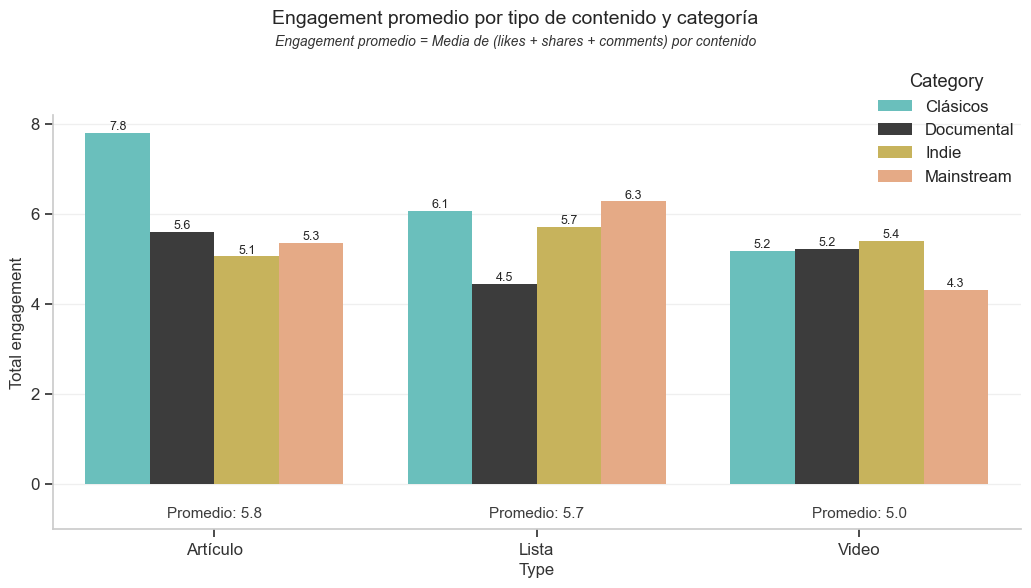

In [16]:
# Configurar estilo
configurar_estilo_peliplat()

# Crear visualización de engagement cruzado
fig, chart = graficar_engagement_cruzado(
    df,
    titulo="Engagement promedio por tipo de contenido y categoría",
    subtitulo="Engagement promedio = Media de (likes + shares + comments) por contenido"
)

# Guardar y mostrar
guardar_figura(chart.figure, "engagement_por_tipo_categoria.png")
plt.show()